## Feature scaling

In [1]:
import numpy as np
import matplotlib.pylab as plt

A implementation of gradient descent for 2d functions.

In [113]:
class GradientDescent:
    def __init__(self, func, func_grad, theta0, alpha):
        """Basic implementation of gradient descent for 2d functions.
        
        Args:
            func (function): 2d function we want to minimize.
            func_grad (function): gradient of func.
            theta0 (numpy.ndarray): starting point.
            alpha (float): learning rate.
        """
        self.func = func
        self.func_grad = func_grad
        self.theta0 = theta0
        self.alpha = alpha
    
    def run(self, max_iter, plt_min, plt_save):
        """Runs gradient descent.
        
        Args:
            max_iter (int): max number of iterations.
            plt_min (numpy.ndarray): minimum of function, for plotting.
            plt_save (str): path to save plot to.
        
        Returns:
            numpy.ndarray: array of all theta-values from start to end.
        """
        theta = self.theta0
        self.thetas = [self.theta0]

        iter_ = 0 # variable to keep track of number of iteration
        while iter_ <= max_iter:
            # Gradient descent update
            theta = theta - self.alpha * self.func_grad(theta)

            # Update number of iterations
            iter_ = iter_ + 1
            self.thetas.append(theta)

        self._plot(plt_min, plt_save)
    
    def _plot(self, min_theta, save_to):
        """Plots function and gradient descent steps as arrows.
        
        Args:
            min_theta (numpy.ndarray): minimum of function.
            save_to (str): path to save plot to.
        """
        plt.clf()
        
        # Plot contours of 2D function
        min_x = -2
        max_x = 6
        domain = np.linspace(min_x, max_x, 100)
        theta1, theta2 = np.meshgrid(domain, domain)
        # Apply function to grid points
        func_grid = np.array(
            [self.func(np.array(c)) for c in zip(theta1.flat, theta2.flat)]
        ).reshape(theta1.shape)
        # Plot contours
        cs = plt.contour(theta1, theta2, func_grid, 10)
        
        # Plot starting point
        plt.plot(*self.thetas[0], color='r', marker='o', markersize=6)
        
        # Plot gradient descent steps as arrow
        for (start, end) in zip(self.thetas[:-1], self.thetas[1:]):
            arrow = np.concatenate([start, end - start])
            plt.quiver(*arrow, color='r', angles='xy', scale_units='xy', scale=1)
        
        # Plot minimum
        plt.plot(*min_theta, color='g', marker='o', markersize=6)

        # Save plot
        plt.clabel(cs, inline=1, fontsize=10, fmt='%1.0f')
        plt.hlines(0, min_x, max_x, color='k', linestyle='--')
        plt.vlines(0, min_x, max_x, color='k', linestyle='--')
        plt.legend()
        plt.xlabel(r'$\theta_1$')
        plt.ylabel(r'$\theta_2$')
        plt.savefig(save_to)

Let's apply gradient descent to the function $J(\theta_1, \theta_2)=9(\theta_1 - 2)^2+(\theta_2 - 1)^2$. Its minimum occurs at $\theta=\begin{pmatrix}\theta_1\\\theta_2\end{pmatrix}=\begin{pmatrix}2\\1\end{pmatrix}$. Note that $\nabla J = \begin{pmatrix}18\theta_1\\2\theta_2\end{pmatrix}$, so the update rule is $\begin{pmatrix}\theta_1\\\theta_2\end{pmatrix} := \begin{pmatrix}\theta_1\\\theta_2\end{pmatrix} - \alpha\begin{pmatrix}18\theta_1\\2\theta_2\end{pmatrix}$. We will use the starting point $\begin{pmatrix}5\\5\end{pmatrix}$.

In [59]:
min_theta = np.array([2, 1])
theta_start = np.array([5, 5])
f = lambda theta: np.dot(np.array([10, 1]), (theta - min_theta)**2)
f_grad = lambda theta: 2 * np.array([10, 1]) * (theta - min_theta)

Below we use $\alpha=0.1$.

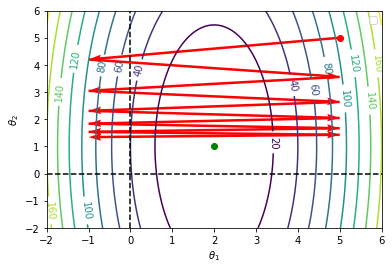

In [117]:
gd1 = GradientDescent(f, f_grad, theta_start, 0.1)
gd1.run(10, min_theta, "fs_zigzag.pdf")

Gradient descent is making large zig-zag moves along the $\theta_1$ direction about $\theta_1=2$, and making slow progress in the $\theta_2$ direction. The reason is that the gradient in the $\theta_1$ direction is much larger. This can be seen from the contrours; they are elongated vertically. The first step, for instance, takes us from $\begin{pmatrix}5\\5\end{pmatrix}$ to $\begin{pmatrix}-1\\4.2\end{pmatrix}$, decreasing $\theta_1$ by $6$, and $\theta_2$ by only $0.8$. Let's try descreasing $\alpha$ to $0.05$.

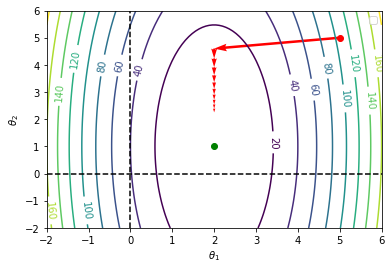

In [118]:
gd2 = GradientDescent(f, f_grad, theta_start, 0.05)
gd2.run(10, min_theta, "fs_zigzag_fixed.pdf")

The large zig-zag moves are now gone. Gradient descent makes one big step along the $\theta_1$ direction, and then takes small steps in the $\theta_2$ direction towards the minimum. Since we had to decrease $\alpha$ to avoid large moves in the $\theta_1$ direction, though, the moves in the $\theta_2$ direction are now much smaller than they need to be.

Let's try another approach. Define $\tilde{\theta}_1 = 3(\theta_1−2)$ and $\tilde{J}(\tilde{\theta}_1, \theta_2)=\tilde{\theta}_1^2+(\theta_2 - 1)^2$, so that $J(\theta_1, \theta_2)=\tilde{J}(3(\theta_1−2), \theta_1)$. We can now run gradient descent on $\tilde{J}$ to find $\tilde{\theta}_1^{min}$, from which we can simply compute $\theta^{min}_1=\tilde{\theta}^{min}_1/3+2$.

In [90]:
min_theta2 = np.array([0, 1])
f2 = lambda theta: np.dot(theta - min_theta2, theta - min_theta2)
f2_grad = lambda theta: 2 * (theta - min_theta2)

What's the point of this? The problem we had with $J$ was that it changes much more quickly in the $\theta_1$ direction. This is no longer the case with $\tilde{J}$.

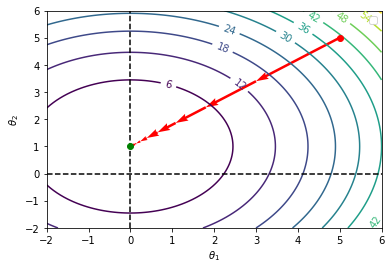

In [119]:
gd3 = GradientDescent(f2, f2_grad, theta_start, 0.2)
gd3.run(10, min_theta2, "fs_scaled.pdf")